In [3]:
import pandas as pd

import pandas as pd
import matplotlib as plt
import numpy as np




dtel=pd.read_csv(r'D:\GUVI\PROJECTS\Final project\data\Telco-Customer-Churn-dataset-cleaned.csv')
dtel.head()
dtel.tail()
dtel.shape
dtel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   SeniorCitizen          7043 non-null   int64  
 2   Partner                7043 non-null   object 
 3   Dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   PhoneService           7043 non-null   object 
 6   MultipleLines          7043 non-null   object 
 7   InternetService        7043 non-null   object 
 8   OnlineSecurity         7043 non-null   object 
 9   OnlineBackup           7043 non-null   object 
 10  DeviceProtection       7043 non-null   object 
 11  TechSupport            7043 non-null   object 
 12  StreamingTV            7043 non-null   object 
 13  StreamingMovies        7043 non-null   object 
 14  Contract               7043 non-null   object 
 15  Pape

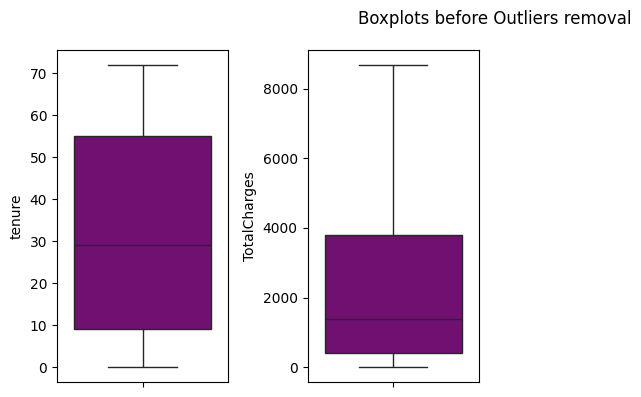

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = ['tenure', 'TotalCharges']

# Loop through numerical columns and create boxplots

plt.figure(figsize=(10, 4))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=dtel[numerical_cols[i]],color='purple',)
    plt.tight_layout()

In [5]:
import numpy as np

for col in numerical_cols:

    Q1 = dtel[col].quantile(0.25)  # 25th percentile
    Q3 = dtel[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at lower and upper bound
    dtel[col] = np.where(dtel[col] < lower_bound, lower_bound, dtel[col])
    dtel[col] = np.where(dtel[col] > upper_bound, upper_bound,dtel[col])

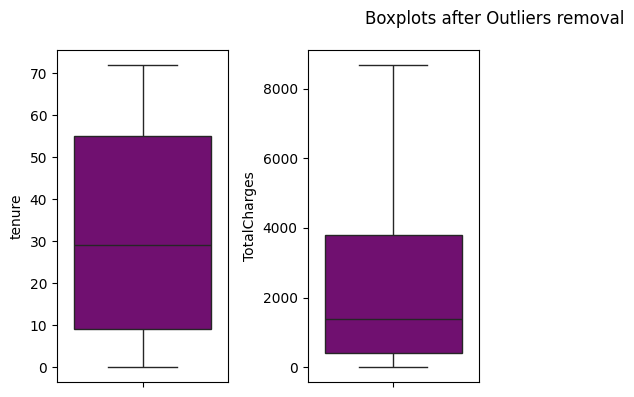

In [6]:
plt.figure(figsize=(10, 4))
plt.suptitle("Boxplots after Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=dtel[numerical_cols[i]],color='purple',)
    plt.tight_layout()

In [7]:
skewness = dtel[numerical_cols].skew()
print("Skewness of numerical columns:")
print(skewness)

Skewness of numerical columns:
tenure          0.239540
TotalCharges    0.963235
dtype: float64


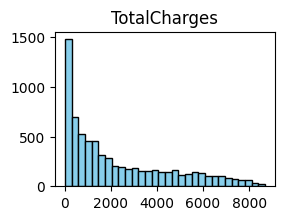

In [8]:

# Select numerical columns with high skewness (absolute skewness > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index

# Plot histograms before transformation
plt.figure(figsize=(10, 4))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(2, 4, i)  # Adjust grid size as needed
    plt.hist(dtel[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dft=pd.DataFrame()
obj_cols = dtel.select_dtypes(include=['object']).columns.tolist()

for col in dtel[obj_cols]:

  dft[col] = ordinal_encoder.fit_transform(dtel[[col]]).ravel()

In [10]:
for col in dtel[obj_cols]:
    print(col)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
tenure-binned
MonthlyCharges-binned
TotalCharges-binned
Churn_l


Top 10 Feature Importances from Random Forest:
Contract            0.210126
PaymentMethod       0.097178
gender              0.061060
OnlineSecurity      0.057103
Partner             0.054515
tenure-binned       0.049735
DeviceProtection    0.049037
MultipleLines       0.047943
PaperlessBilling    0.047697
OnlineBackup        0.047220
dtype: float64


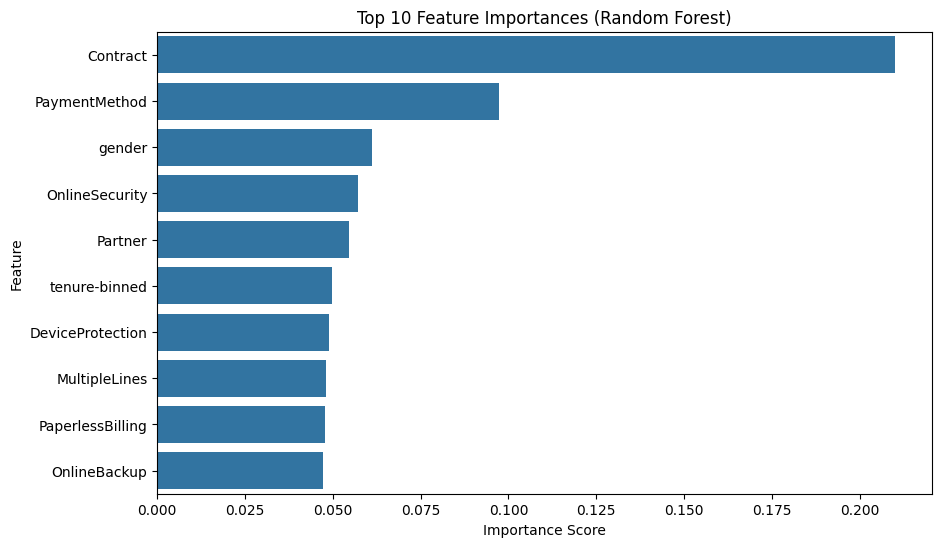

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Select features (drop target and any non-numeric/categorical columns)
feature_cols = [col for col in dft.columns if col not in ['Churn','Churn_l'] ]
X = dft[feature_cols].select_dtypes(include=[np.number]).fillna(0)
y = dft['Churn_l']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Show top features
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Top 10 Feature Importances from Random Forest:")
print(feat_imp.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.head(10), y=feat_imp.head(10).index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [12]:
#m=pd.merge(dft, dt[['tenure','TotalCharges','conbin','tbin' ,'cbin' ]], left_index=True, right_index=True)
allm=pd.merge(dft, dtel[['MonthlyCharges','SeniorCitizen','tenure','TotalCharges']], left_index=True, right_index=True)
allm['Churn_l']

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn_l, Length: 7043, dtype: float64

Top 10 Feature Importances from Random Forest:
TotalCharges             0.182064
MonthlyCharges           0.169074
tenure                   0.143112
Contract                 0.071107
PaymentMethod            0.049698
OnlineSecurity           0.039886
TechSupport              0.038771
InternetService          0.028850
OnlineBackup             0.028298
gender                   0.028053
PaperlessBilling         0.025246
DeviceProtection         0.023981
tenure-binned            0.023690
Partner                  0.022677
MultipleLines            0.021783
SeniorCitizen            0.020668
Dependents               0.019687
MonthlyCharges-binned    0.017083
StreamingMovies          0.016346
StreamingTV              0.016139
TotalCharges-binned      0.009379
PhoneService             0.004407
dtype: float64


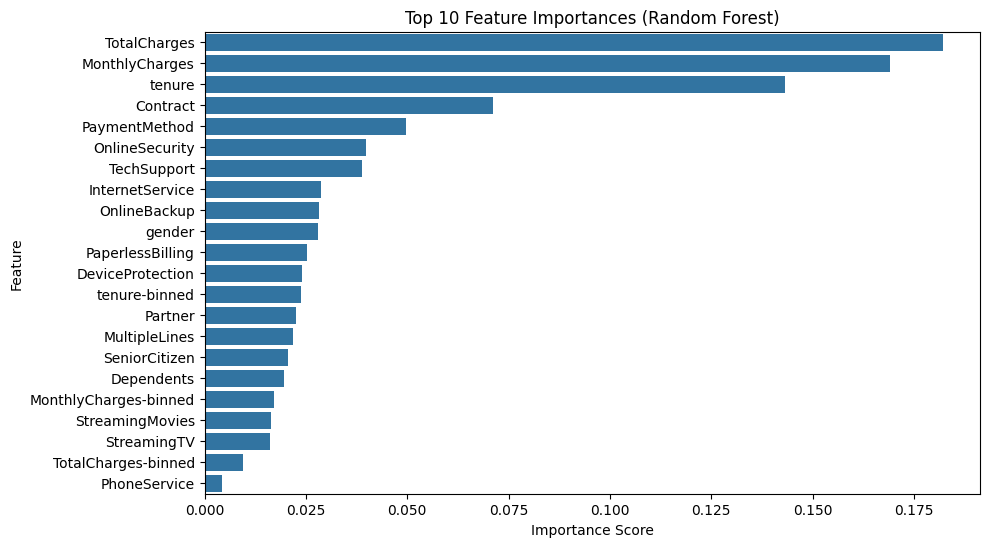

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Select features (drop target and any non-numeric/categorical columns)
feature_colsm = [col for col in allm.columns if col not in ['Churn','Churn_l'] ]
X = allm[feature_colsm].select_dtypes(include=[np.number]).fillna(0)
y = allm['Churn_l']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Show top features
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Top 10 Feature Importances from Random Forest:")
print(feat_imp)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [14]:
dtt=allm[['MonthlyCharges','TotalCharges','tenure','Contract','PaymentMethod','OnlineSecurity','gender','Churn_l']]

In [ ]:
encoder = OrdinalEncoder()
ent=pd.DataFrame()
cat_cols = ["Contract", "PaymentMethod","OnlineSecurity","gender"]

for col in dtel[cat_cols]:
  ent[col] = encoder.fit_transform(dtel[[col]]).ravel()

array([[0., 2., 0., 0.],
       [1., 3., 2., 1.],
       [0., 3., 2., 1.],
       ...,
       [0., 2., 2., 0.],
       [0., 3., 0., 1.],
       [2., 0., 2., 1.]], shape=(7043, 4))

In [17]:
print(ent.columns) 
print(ent.head())

Index(['Contract', 'PaymentMethod', 'OnlineSecurity', 'gender'], dtype='object')
   Contract  PaymentMethod  OnlineSecurity  gender
0       0.0            2.0             0.0     0.0
1       1.0            3.0             2.0     1.0
2       0.0            3.0             2.0     1.0
3       1.0            0.0             2.0     1.0
4       0.0            2.0             0.0     0.0


In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


X1 = dtt.drop('Churn_l', axis=1)

X=X1.drop('MonthlyCharges', axis=1)
y = dtt['Churn_l']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(n_estimators=100,class_weight="balanced",  random_state=42,)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
csr = classification_report(y_test, y_pred)
acs =  accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Random Forest Regression Performance:")
print(f"csr: {csr}")
print(f"acs: {acs}")
print(f"cm: {cm}")

        

Random Forest Regression Performance:
csr:               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1585
         1.0       0.55      0.50      0.53       528

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.77      0.77      0.77      2113

acs: 0.7737813535257927
cm: [[1369  216]
 [ 262  266]]


In [15]:
from sklearn import tree

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

X = allm.drop('Churn_l', axis=1)
y = allm['Churn_l']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
csr = classification_report(y_test, y_pred)
acs =  accuracy_score(y_test, y_pred)



print("Decision tree Performance:")
print(f"csr: {csr}")
print(f"acs: {acs}")
  
        

Decision tree Performance:
csr:               precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      1036
         1.0       0.48      0.49      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.73      1409

acs: 0.7246273953158269


In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [17]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [19]:
import pickle
with open("encoder.pkl", "rb") as f:
   encoder= pickle.load(f)

In [20]:
encoder.categories_

[array(['Female', 'Male'], dtype=object)]

In [22]:
import pickle
encoder = OrdinalEncoder()
ent=pd.DataFrame()
cat_cols = ["Contract", "PaymentMethod","OnlineSecurity","gender"]

for col in cat_cols:
  encoder.fit_transform(dtel[[col]]).ravel()
  with open(f"{col}_encoder.pkl", "wb") as f:
     pickle.dump(encoder, f)